In [15]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..")
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib  import cm
from matplotlib.colors import TwoSlopeNorm
from matplotlib.colors import LogNorm, Normalize

#from matplotlib.colors import TwoSlopeNorm

datadir = '/Users/billiemeadowcroft/Dropbox/PhDGithub/RemoteDumbbells/Data_and_Figures/Figs_TimeToWrapHeatmap/Data/' #WrappingEpsSizeMass30

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
def FindPdiff(rat,init):
    Number = 45130
    No_OUT = Number * init
    No_IN = rat*No_OUT/41.95
    Vin_cell  = 6326
    Vbox_nocell = 265621
    pIN = No_IN/Vin_cell
    pOUT = No_OUT/Vbox_nocell
    Difference = pIN-pOUT
    return Difference

#real units when sigma = 10nm, Temp (=1 in lj) = epsilon = 4.34kT?, 

def RealUnits(press):
    T = 4.34
    Pressure = T*press/72.46 #N/m^2
    Tension1 = Pressure*1.7*10**-6/2 #N/m
    Tension2 = Tension1*10**9 #nN/(m)
    
    return Tension2 #nN/m



## Mass 30 plot:

/Users/billiemeadowcroft/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/billiemeadowcroft/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/billiemeadowcroft/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/billiemeadowcroft/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/billiemeadowcroft/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


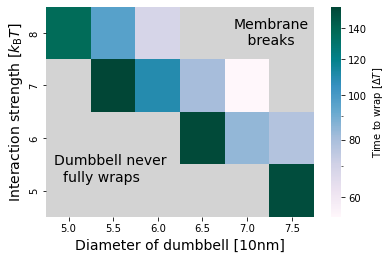

In [17]:
fig,ax = plt.subplots()
# size 5 eps 5---> doesn't ever wrap
Eps = "5 6 7 8".split()
Size = "5.0 5.5 6.0 6.5 7.0 7.5".split()# 4.6 5.0".split()
#wrapEngulfed = "6.3 7.0 6.5 5.3 3.9 2.6".split()# 8.0 7.0".split()
wrapEngulfed = "6.1 6.1 5.6 4.5 3.0 2.6".split()# 8.0 7.0".split()
AvSpeed = np.zeros((len(Eps),len(Size)))
STDSpeed = np.zeros((len(Eps),len(Size)))
AvSimLength = np.zeros((len(Eps),len(Size)))
for l in range(len(Eps)):
    for k in range(len(Size)):
        Speeds = []
        for i in range(30):
            count = 0
            
            wrapN_1 = pandas.read_csv(datadir + "WrappingEpsSizeMass30/wrapping_"+str(Eps[l])+"_"+str(Size[k])+"_init_0.000_rat_0.000_seed_"+str(i+1)+".dat", header = None, sep=' ')[1]
            if k == len(Size)-1 or l==0 or l==1:
                #print("yup")
                wrapN_2 = pandas.read_csv(datadir + "WrappingEpsSizeMass30_2/wrapping_"+str(Eps[l])+"_"+str(Size[k])+"_init_0.000_rat_0.000_seed_"+str(i+1)+".dat", header = None, sep=' ')[1]
                wrapN= np.append(wrapN_1,wrapN_2)
            else:
                wrapN = wrapN_1
            #if i == 12 and k == 4 and :
            #    print(len(wrapN))
            if len(wrapN) > 4:
                for j in range(len(wrapN)):
                    R = Size[k]
                    denom = float(R)**2
                    wrap_rescaled = np.divide(wrapN[j],denom)
                    wrapEng = wrapEngulfed[k]
                    if wrap_rescaled > float(wrapEng) and count == 0:
                        count = 1
                        timeToWrap = j
                    if count == 0 and j == len(wrapN)-1:
                        timeToWrap = None
                
                Speeds.append(timeToWrap)
                if j ==0 and k==0:
                    print(Speeds)
        if np.mean([x for x in Speeds if x != None]) >= 160: #Dumbbell never fully wraps
            AvSpeed[l][k] = None
        else:
            AvSpeed[l][k]=np.mean([x for x in Speeds if x != None])
        STDSpeed[l][k] = np.std([x for x in Speeds if x != None])/(np.sqrt(len(Speeds)))#This isn't quite right..
#by hand find where membrane breaks:
        
AvSpeed[3][3] = None #eps 8 sizes 6.5,7,7.5,eps 7 sizes 7,7.5
AvSpeed[3][4] = None
AvSpeed[3][5] = None
#AvSpeed[2][4] = None
AvSpeed[2][5] = None

divnorm = TwoSlopeNorm(vmin=10, vcenter=25, vmax=60)#(DoS).min()
#sns.set(font_scale=1.2)
#ax=sns.heatmap(DoS,xticklabels=x, yticklabels=y, cmap="PuBuGn",cbar_kws={'label': 'DoS'}, norm=divnorm, cbar=True)

ax = sns.heatmap(AvSpeed,xticklabels=Size, yticklabels=Eps,cmap="PuBuGn",cbar_kws={'label': r'Time to wrap [$\Delta T$]'},norm=LogNorm())
cbar = ax.collections[0].colorbar
cbar.set_ticks([60,80,100,120,140])
cbar.set_ticklabels(['60', '80', '100', '120','140'])

textstr2 = r"Dumbbell never" "\n" "  fully wraps"
textstr1 = r"Membrane" "\n" "   breaks"
ax.text(0.03, 0.3, textstr2, transform=ax.transAxes, fontsize=14,verticalalignment='top')
ax.text(0.7, 0.95, textstr1, transform=ax.transAxes, fontsize=14,verticalalignment='top')
ax.set_facecolor('lightgrey')
ax.invert_yaxis()
ax.set_ylabel(r"Interaction strength [$k_{\mathrm{B}}T$]", fontsize = 14)
ax.set_xlabel(r"Diameter of dumbbell [10nm]", fontsize = 14)#"($ \mu m$)")
plt.gcf().subplots_adjust(bottom=0.15)
fig.savefig('./Plots/HeatplotMass30TimeToWrap.pdf')
#name1 = "SweetSpot_size" + str(sizes[l]) + "_eps"+ str(eps[k])+".png"
#fig2.savefig(plotsdir+name1)

## No mass plot:

Do I need data for this?

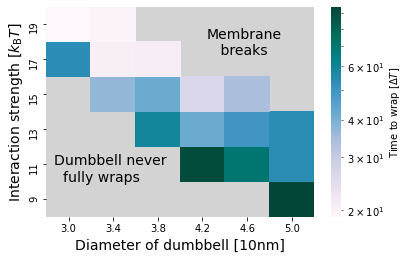

In [3]:
fig,ax = plt.subplots()

Eps = "9 11 13 15 17 19".split()
Size = "3.0 3.4 3.8 4.2 4.6 5.0".split()# 4.6 5.0".split()
wrapEngulfed = "11.5 10.5 10 9.5 9 8".split()# 8.0 7.0".split()
AvSpeed = np.zeros((len(Eps),len(Size)))
STDSpeed = np.zeros((len(Eps),len(Size)))
AvSimLength = np.zeros((len(Eps),len(Size)))
for l in range(len(Eps)):
    for k in range(len(Size)):
        Speeds = []
        for i in range(23):
            count = 0
            if i == 0 and l ==3 and k ==5:
                wrapN = [0,0]
            else:
                wrapN = pandas.read_csv(datadir + "/wrappingfilesRcut/wrapping_"+str(Eps[l])+"_"+str(Size[k])+"_init_0.150_rat_3.000_seed_"+str(i+1)+".dat", header = None, sep=' ')[1]
            if len(wrapN) >4:
                for j in range(len(wrapN)):
                    R = Size[k]
                    denom = float(R)**2
                    wrap_rescaled = np.divide(wrapN[j],denom)
                    wrapEng = wrapEngulfed[k]
                    if wrap_rescaled > float(wrapEng) and count == 0:
                        count = 1
                        timeToWrap = j
                    if count == 0 and j == len(wrapN)-1:
                        timeToWrap = 105
            
                Speeds.append(timeToWrap)
                if j ==0 and k==0:
                    print(Speeds)
        if np.mean(Speeds) > 95:
            AvSpeed[l][k] = None
        else:
            AvSpeed[l][k]=np.mean(Speeds)
        STDSpeed[l][k] = np.std(Speeds)/(np.sqrt(len(Speeds)))#AvSpeed[5][5] = None


AvSpeed[5][5] = None
AvSpeed[4][5] = None
AvSpeed[5][4] = None
AvSpeed[4][4] = None
AvSpeed[5][3] = None
AvSpeed[3][5] = None
AvSpeed[4][3] = None
AvSpeed[5][2] = None

divnorm = TwoSlopeNorm(vmin=10, vcenter=25, vmax=60)#(DoS).min()
#sns.set(font_scale=1.2)
#ax=sns.heatmap(DoS,xticklabels=x, yticklabels=y, cmap="PuBuGn",cbar_kws={'label': 'DoS'}, norm=divnorm, cbar=True)

#print("Eps 15 Size 5",AvSpeed[3][5],AvSimLength[3][5] )
ax = sns.heatmap(AvSpeed,xticklabels=Size, yticklabels=Eps,cmap="PuBuGn",cbar_kws={'label': r'Time to wrap [$\Delta T$]'},norm=LogNorm())
textstr2 = r"Dumbbell never" "\n" "  fully wraps"
textstr1 = r"Membrane" "\n" "   breaks"
ax.text(0.03, 0.3, textstr2, transform=ax.transAxes, fontsize=14,verticalalignment='top')
ax.text(0.6, 0.9, textstr1, transform=ax.transAxes, fontsize=14,verticalalignment='top')
ax.set_facecolor('lightgrey')
ax.invert_yaxis()
ax.set_ylabel(r"Interaction strength [$k_{\mathrm{B}}T$]", fontsize = 14)
ax.set_xlabel(r"Diameter of dumbbell [10nm]", fontsize = 14)#"($ \mu m$)")
plt.gcf().subplots_adjust(bottom=0.15)
fig.savefig('./plots/HeatplotSpeed/SizeEpsSpeedHeatplot_frmWrp.pdf')
#name1 = "SweetSpot_size" + str(sizes[l]) + "_eps"+ str(eps[k])+".png"
#fig2.savefig(plotsdir+name1)